In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

# from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

bank = pd.read_csv('./bank-full.csv')

bank.dropna()
bank['job'].replace(["admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"],range(12),inplace=True)
bank['marital'].replace(["married","divorced","single"],range(3),inplace=True)
bank['education'].replace(["unknown","secondary","primary","tertiary"],range(4),inplace=True)
bank['default'].replace(["yes","no"],range(2),inplace=True)
bank['housing'].replace(["yes","no"],range(2),inplace=True)
bank['loan'].replace(["yes","no"],range(2),inplace=True)
bank['contact'].replace(["unknown","telephone","cellular"],range(3),inplace=True)
bank['month'].replace(["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"],range(12),inplace=True)
bank['poutcome'].replace(["unknown","other","failure","success"],range(4),inplace=True)
bank['y'].replace(["yes","no"],range(2),inplace=True)

X = bank.drop(['contact', 'day', 'month', 'y'], axis=1).to_numpy()
y = bank['y'].to_numpy()

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.30, random_state=0)

In [55]:
train_data.shape

(31647, 16)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.callbacks import TensorBoard
import datetime

# Building Keras Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dense(128, activation='relu'),
    Dense(2, activation='softmax'),
])

# Compile Keras Model
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'],
)

log_dir = "logs/fit/Bank_Marketing_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [11]:
model.fit(
  train_data, # training data
  train_labels, # training targets
  epochs=20,
  batch_size=32,
  validation_data=(test_data, test_labels),
  callbacks=[tensorboard_callback]
)

model.save_weights('./models/Bank_Marketing_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '_model.h5')

Train on 31647 samples, validate on 13564 samples
Epoch 1/20
31647/31647 [==============================] - 3s 83us/sample - loss: 4.5003 - accuracy: 0.8150 - val_loss: 3.3539 - val_accuracy: 0.6005
Epoch 2/20
31647/31647 [==============================] - 2s 74us/sample - loss: 2.0993 - accuracy: 0.8419 - val_loss: 1.0273 - val_accuracy: 0.8803
Epoch 3/20
31647/31647 [==============================] - 2s 75us/sample - loss: 1.3056 - accuracy: 0.8543 - val_loss: 5.8821 - val_accuracy: 0.8782
Epoch 4/20
31647/31647 [==============================] - 2s 77us/sample - loss: 1.3682 - accuracy: 0.8514 - val_loss: 0.3494 - val_accuracy: 0.8840
Epoch 5/20
31647/31647 [==============================] - 2s 76us/sample - loss: 0.6280 - accuracy: 0.8680 - val_loss: 0.8682 - val_accuracy: 0.8842
Epoch 6/20
31647/31647 [==============================] - 2s 73us/sample - loss: 0.6320 - accuracy: 0.8697 - val_loss: 0.4599 - val_accuracy: 0.8831
Epoch 7/20
31647/31647 [==============================] 

In [3]:
from collections import Counter
model.load_weights('./models/Bank_Marketing_20200405-164525_model.h5')

predictions = model.predict(X)

pred_array = np.argmax(predictions, axis=1)
actual_array = y

# comparisons = Counter([a == actual_array[index] for index, a in enumerate(pred_array)])
# comparisons

45211
[1 1 1 ... 0 1 1]
[1 1 1 ... 0 1 1]


Counter({True: 40211, False: 5000})

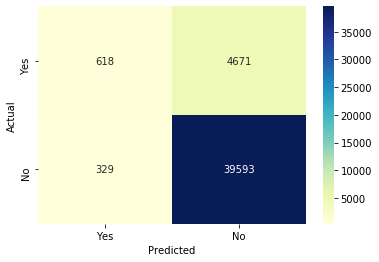

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = confusion_matrix(actual_array, pred_array)

df_cm = pd.DataFrame(array, index = [i for i in np.array(['Yes', 'No'])],
                  columns = [i for i in np.array(['Yes', 'No'])])

fig = sn.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()